In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset with 'fine' labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Assertions to verify the shapes of the loaded data
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Define the number of classes we want to keep
num_classes_to_keep = 20

# Filter the training data to only include the first 20 classes
train_indices = np.isin(y_train, range(num_classes_to_keep))
x_train_filtered = x_train[train_indices.flatten()]
y_train_filtered = y_train[train_indices]

# Filter the test data to only include the first 20 classes
test_indices = np.isin(y_test, range(num_classes_to_keep))
x_test_filtered = x_test[test_indices.flatten()]
y_test_filtered = y_test[test_indices]

# Check the number of unique labels in the filtered y_train
unique_labels = np.unique(y_train_filtered)
num_unique_labels = len(unique_labels)

print(f"Number of unique labels in filtered y_train: {num_unique_labels}")
print(f"Unique labels: {unique_labels}")

169001437/169001437 [==============================] - 6s 0us/step
Number of unique labels in filtered y_train: 20
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


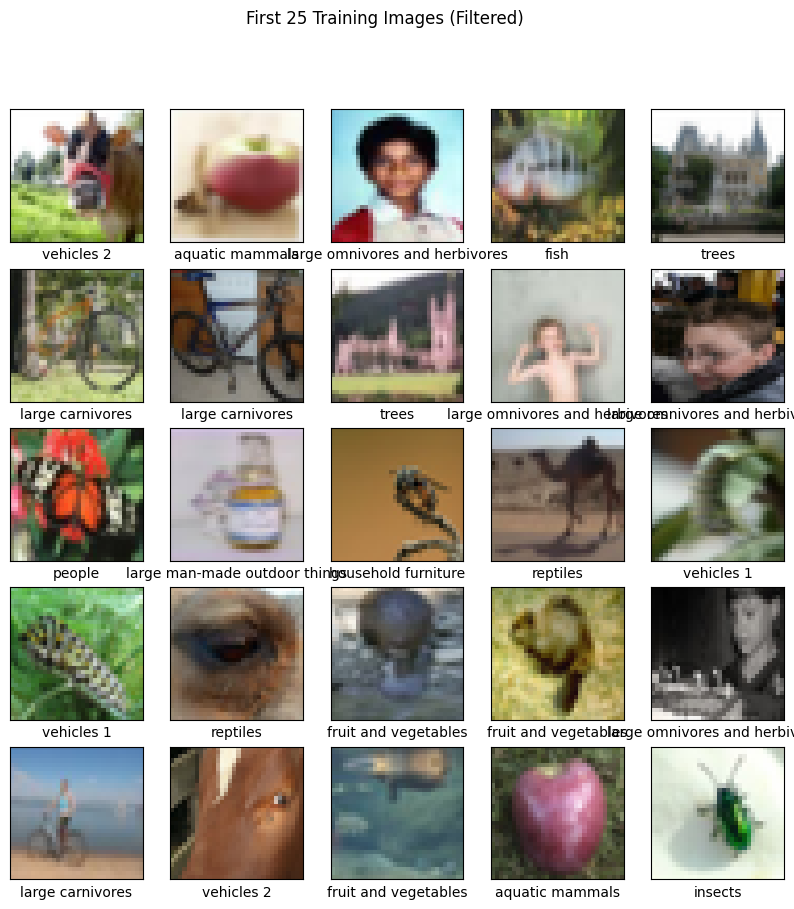

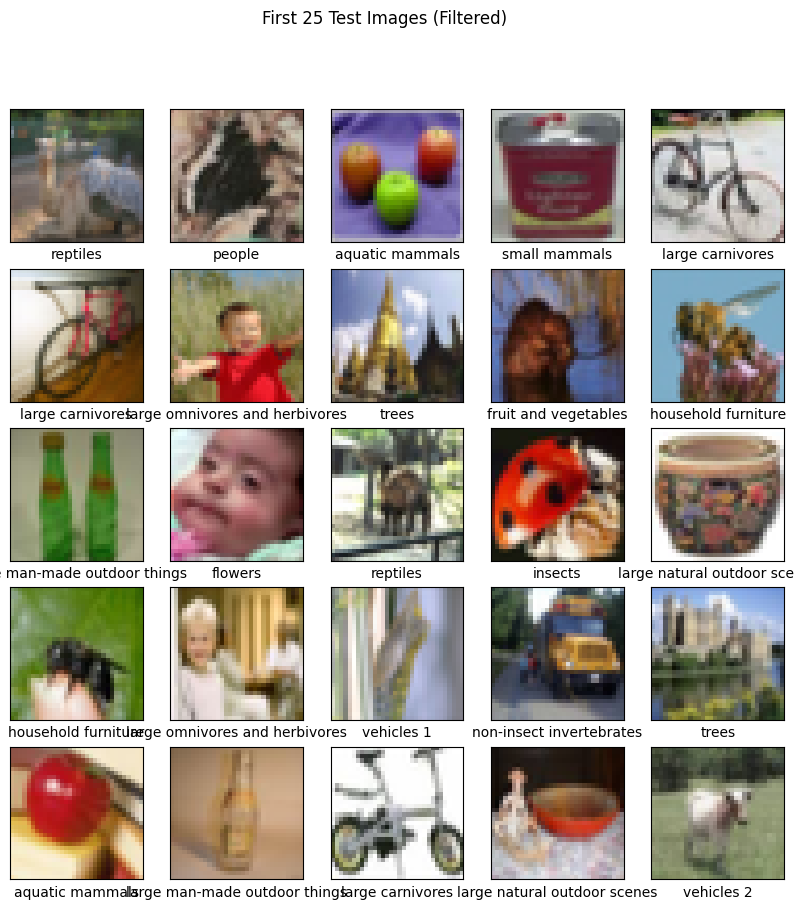

In [5]:
# Class names for coarse labels
class_names = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables",
    "household electrical devices", "household furniture", "insects", "large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes", "large omnivores and herbivores",
    "medium-sized mammals", "non-insect invertebrates", "people", "reptiles", "small mammals", "trees",
    "vehicles 1", "vehicles 2"
]

# Filter the datasets to include only the first 20 classes (0 to 19)
def filter_first_20_classes(x, y, num_classes=20):
    indices = np.isin(y, range(num_classes))
    return x[indices.flatten()], y[indices.flatten()]

x_train_filtered, y_train_filtered = filter_first_20_classes(x_train, y_train)
x_test_filtered, y_test_filtered = filter_first_20_classes(x_test, y_test)

def plot_images(images, labels, class_names, title):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])  # Access the first element of labels[i]
    plt.suptitle(title)
    plt.show()

plot_images(x_train_filtered, y_train_filtered, class_names, "First 25 Training Images (Filtered)")
plot_images(x_test_filtered, y_test_filtered, class_names, "First 25 Test Images (Filtered)")


In [6]:
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))  # Output layer with 20 neurons for CIFAR-100 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        16448     
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

Epoch 1/20
313/313 [==============================] - 46s 142ms/step - loss: 3.2056 - accuracy: 0.1758 - val_loss: 2.3455 - val_accuracy: 0.2825
Epoch 2/20
313/313 [==============================] - 44s 139ms/step - loss: 2.1929 - accuracy: 0.3386 - val_loss: 2.1132 - val_accuracy: 0.3620
Epoch 3/20
313/313 [==============================] - 44s 140ms/step - loss: 1.8683 - accuracy: 0.4349 - val_loss: 2.0469 - val_accuracy: 0.3830
Epoch 4/20
313/313 [==============================] - 47s 151ms/step - loss: 1.6048 - accuracy: 0.5150 - val_loss: 1.9037 - val_accuracy: 0.4315
Epoch 5/20
313/313 [==============================] - 44s 141ms/step - loss: 1.3855 - accuracy: 0.5728 - val_loss: 1.8059 - val_accuracy: 0.4595
Epoch 6/20
313/313 [==============================] - 45s 144ms/step - loss: 1.1766 - accuracy: 0.6339 - val_loss: 1.9276 - val_accuracy: 0.4685
Epoch 7/20
313/313 [==============================] - 45s 144ms/step - loss: 1.0274 - accuracy: 0.6775 - val_loss: 1.9423 - val_ac

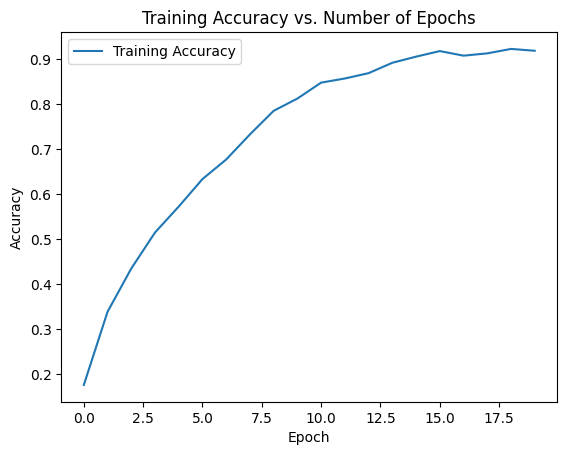

63/63 [==============================] - 2s 35ms/step - loss: 4.1181 - accuracy: 0.4535
Test Accuracy: 0.45350000262260437


In [7]:
# Train the model
history = model.fit(x_train_filtered, y_train_filtered, epochs=20, validation_data=(x_test_filtered, y_test_filtered))

# Plot training accuracy vs. number of epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Number of Epochs')
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_filtered, y_test_filtered)
print(f'Test Accuracy: {test_accuracy}')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 16, 16, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_17 (Ba  (None, 16, 16, 64)           256       ['conv2d_24[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_17 (ReLU)             (None, 16, 16, 64)           0         ['batch_normalization_17

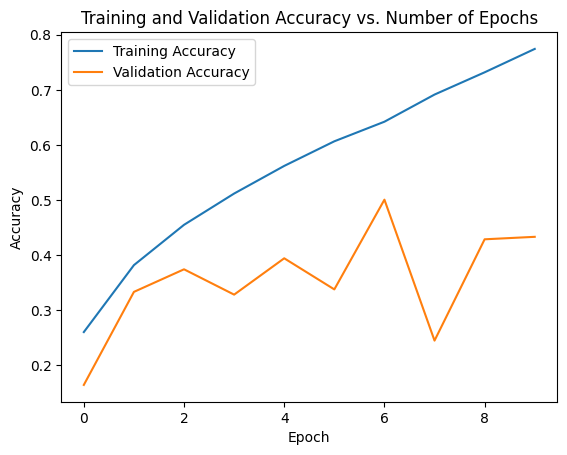

63/63 [==============================] - 6s 91ms/step - loss: 1.9982 - accuracy: 0.4330
Test Accuracy: 0.43299999833106995


In [8]:
# Define the ResNet-18 model architecture
import tensorflow as tf
from tensorflow.keras import layers, models


def resnet_block(inputs, filters, kernel_size, strides=1, activation=True):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    if activation:
        x = layers.ReLU()(x)
    return x

inputs = tf.keras.Input(shape=(32, 32, 3))

# Initial convolution and max-pooling
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Define the residual blocks
def resnet_layer(inputs, num_filters, kernel_size, strides=1):
    x = resnet_block(inputs, num_filters, kernel_size, strides=strides)
    x = resnet_block(x, num_filters, kernel_size, activation=False)
    if strides != 1 or inputs.shape[-1] != num_filters:
        inputs = layers.Conv2D(num_filters, (1, 1), strides=strides, padding='same')(inputs)
    x = layers.add([x, inputs])
    x = layers.ReLU()(x)
    return x

# ResNet blocks
x = resnet_layer(x, 64, (3, 3))
x = resnet_layer(x, 64, (3, 3))

x = resnet_layer(x, 128, (3, 3), strides=2)
x = resnet_layer(x, 128, (3, 3))

x = resnet_layer(x, 256, (3, 3), strides=2)
x = resnet_layer(x, 256, (3, 3))

x = resnet_layer(x, 512, (3, 3), strides=2)
x = resnet_layer(x, 512, (3, 3))

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Dense layer with 20 neurons (number of classes)
outputs = layers.Dense(20, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train_filtered, y_train_filtered, epochs=10, validation_data=(x_test_filtered, y_test_filtered))

# Plot training accuracy vs. number of epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_filtered, y_test_filtered)
print(f'Test Accuracy: {test_accuracy}')